In [1]:
import site
site.addsitedir("../ARGUS")

from ARGUS_ptx_ar_train import ARGUS_ptx_ar_train

In [2]:
nnet = ARGUS_ptx_ar_train("../ARGUS/ARGUS_ptx_ar.cfg", "vfold", device_num=0)
nnet.setup_vfold_files()

Num images / labels = 62 62
Num pos / Num neg = 32 / 30
VFold-Prefix[0] = ['s030s_iimage_118049', 's065s_iimage_190185', 's206s_iimage_149926', 's030s_iimage_677741', 'n247ns_image_27430', 'n210ns_image_61458', 'n247ns_image_27348']
VFold-Prefix[1] = ['s224s_iimage_331594', 's211s_iimage_392513', 's208s_iimage_104932', 's211s_iimage_392921', 'n035ns_image_14048', 'n218ns_image_60569', 'n027ns_image_47438']
VFold-Prefix[2] = ['s236s_iimage_113976', 's081s_iimage_332034', 's206s_iimage_151133', 'n219ns_image_18841', 'n026ns_image_10877', 'n117ns_image_42679']
VFold-Prefix[3] = ['s034s_iimage_336839', 's224s_iimage_330840', 's037s_iimage_588413', 'n117ns_image_41722', 'n055ns_image_27185', 'n026ns_image_10832']
VFold-Prefix[4] = ['s034s_iimage_340183', 's208s_iimage_104543', 's019s_iimage_107059', 'n048ns_image_17495', 'n193ns_image_63412', 'n027ns_image_46416']
VFold-Prefix[5] = ['s228s_iimage_332146', 's081s_iimage_295967', 's004s_iimage_741322', 'n135ns_image_24545', 'n055ns_image_2718

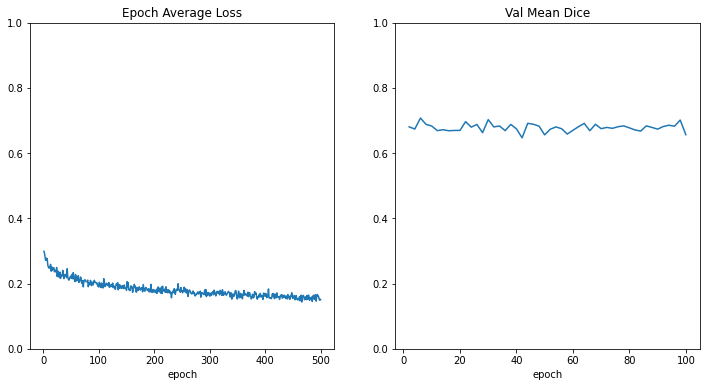

In [4]:
nnet.view_training_metric_curves(vfold_num=1, run_id=0)

VFOLD = 0 of 9
Image: n135ns_image_2418161753608_clean.mha


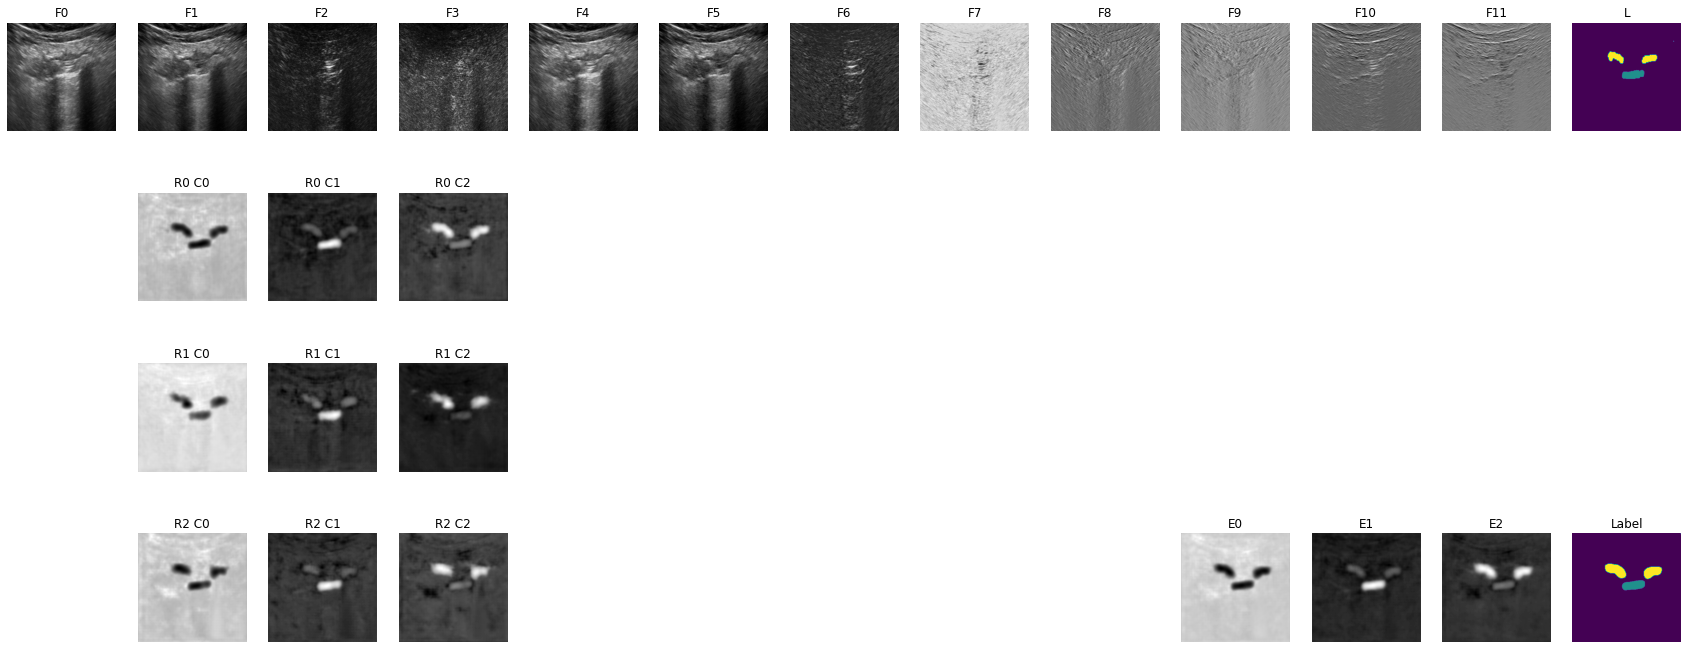

Image: n219ns_image_1895283541879_clean.mha


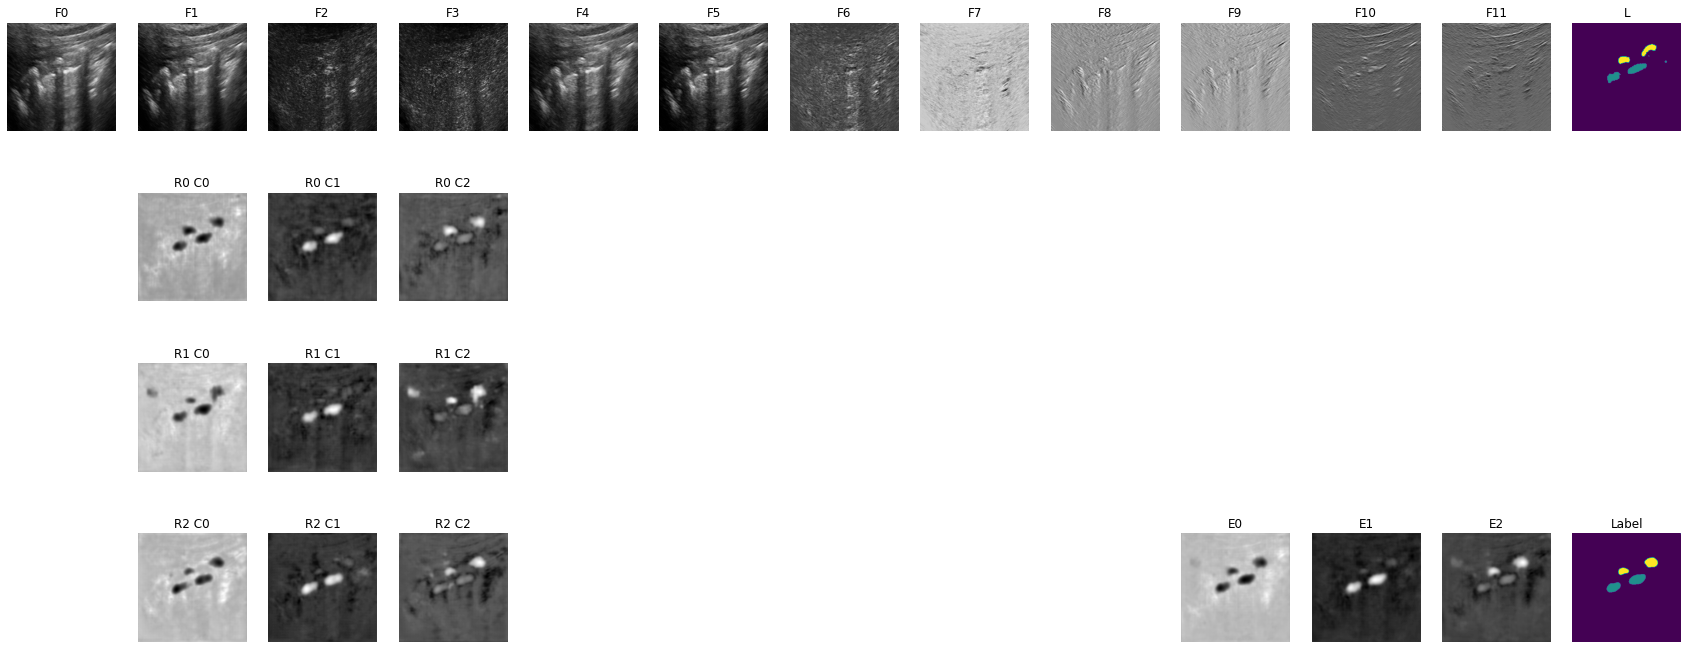

Image: n221ns_image_588695055398_clean.mha


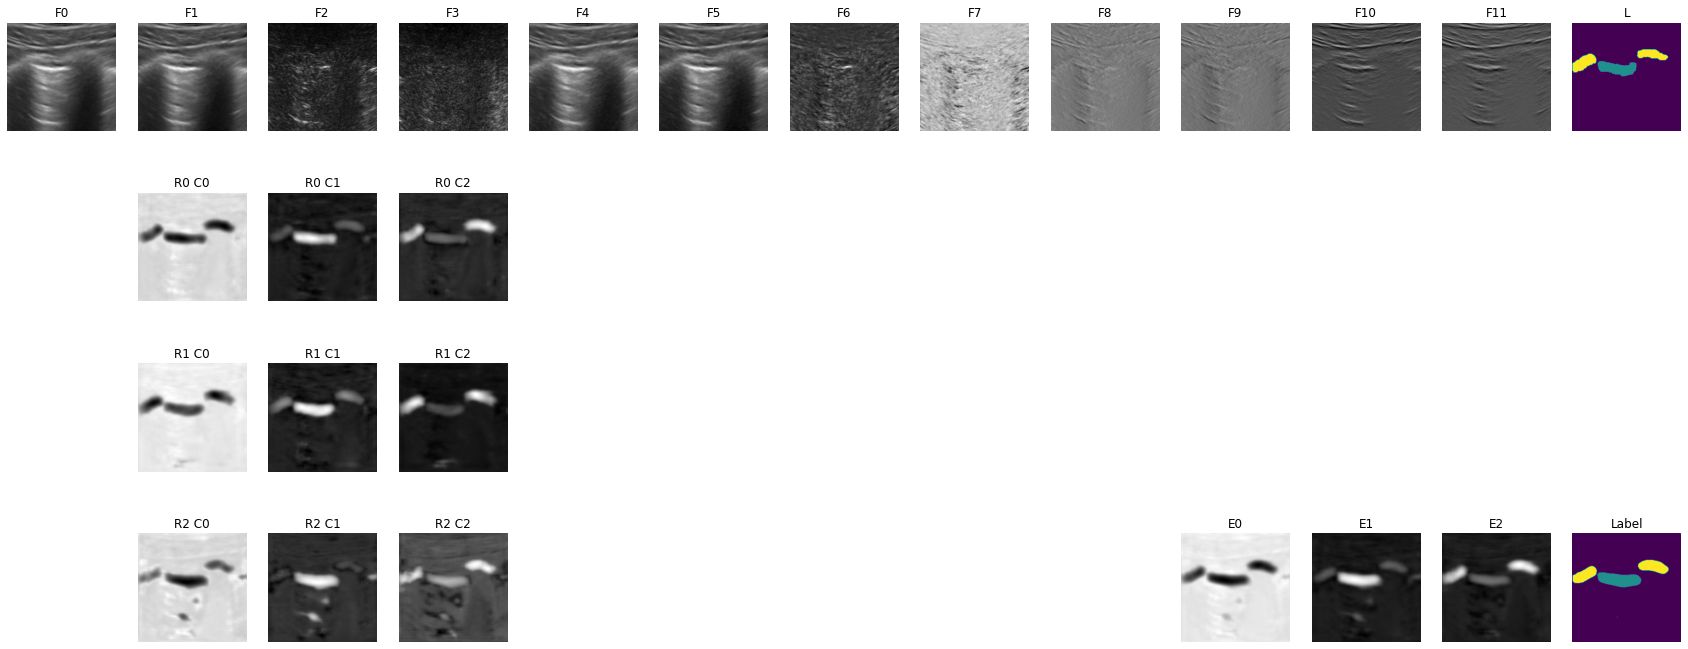

Image: s019s_iimage_10891015221417_clean.mha


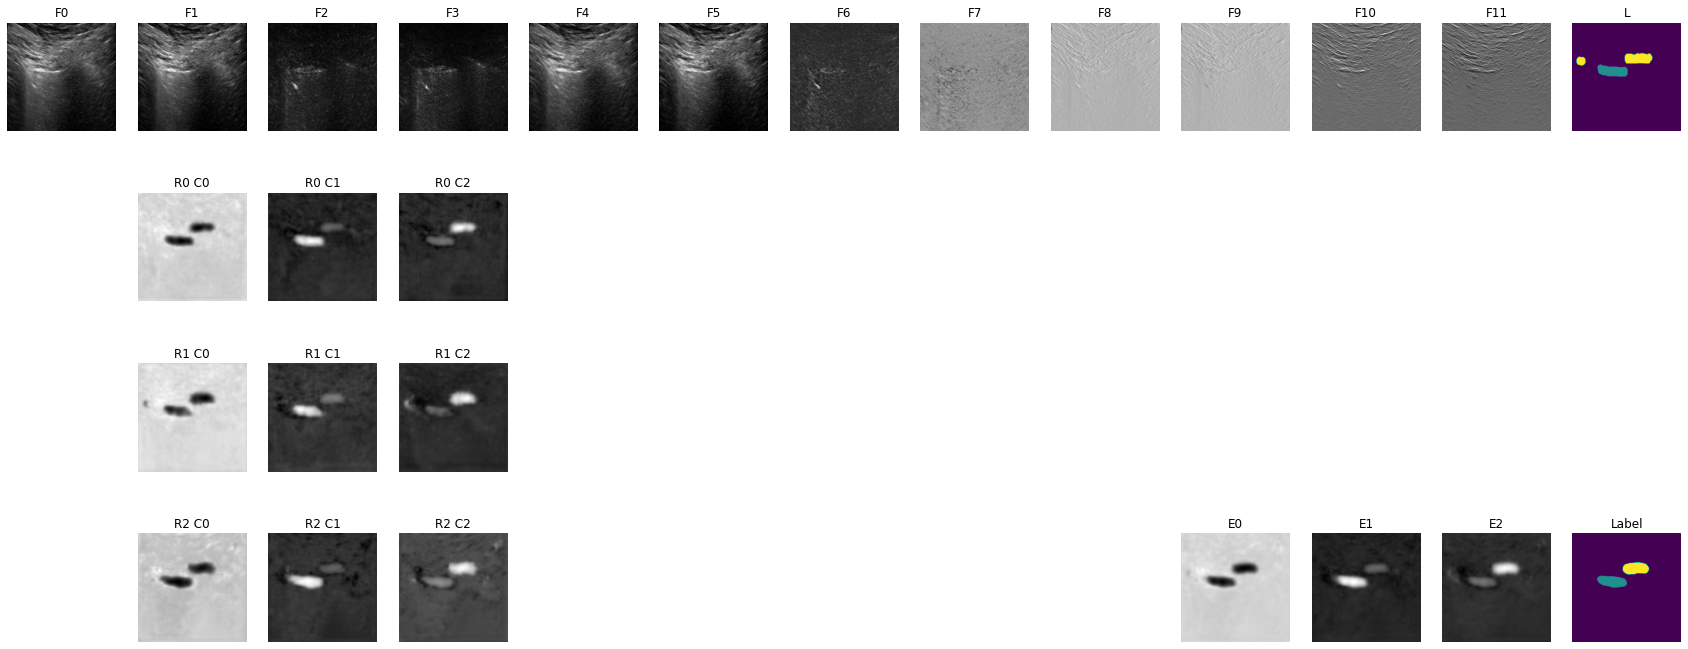

Image: s043s_iimage_10395655826502_CLEAN.mha


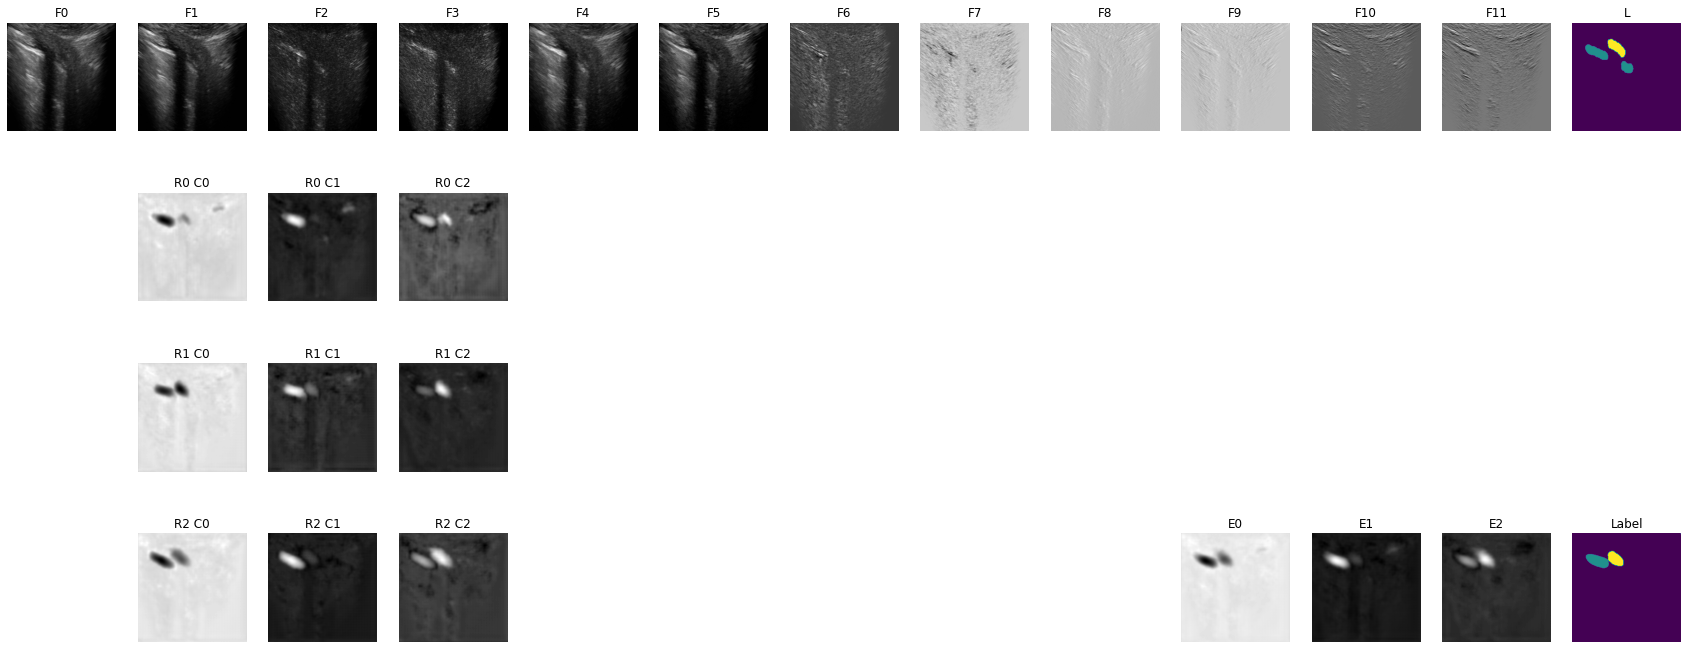

Image: s065s_iimage_1896534330004_clean.mha


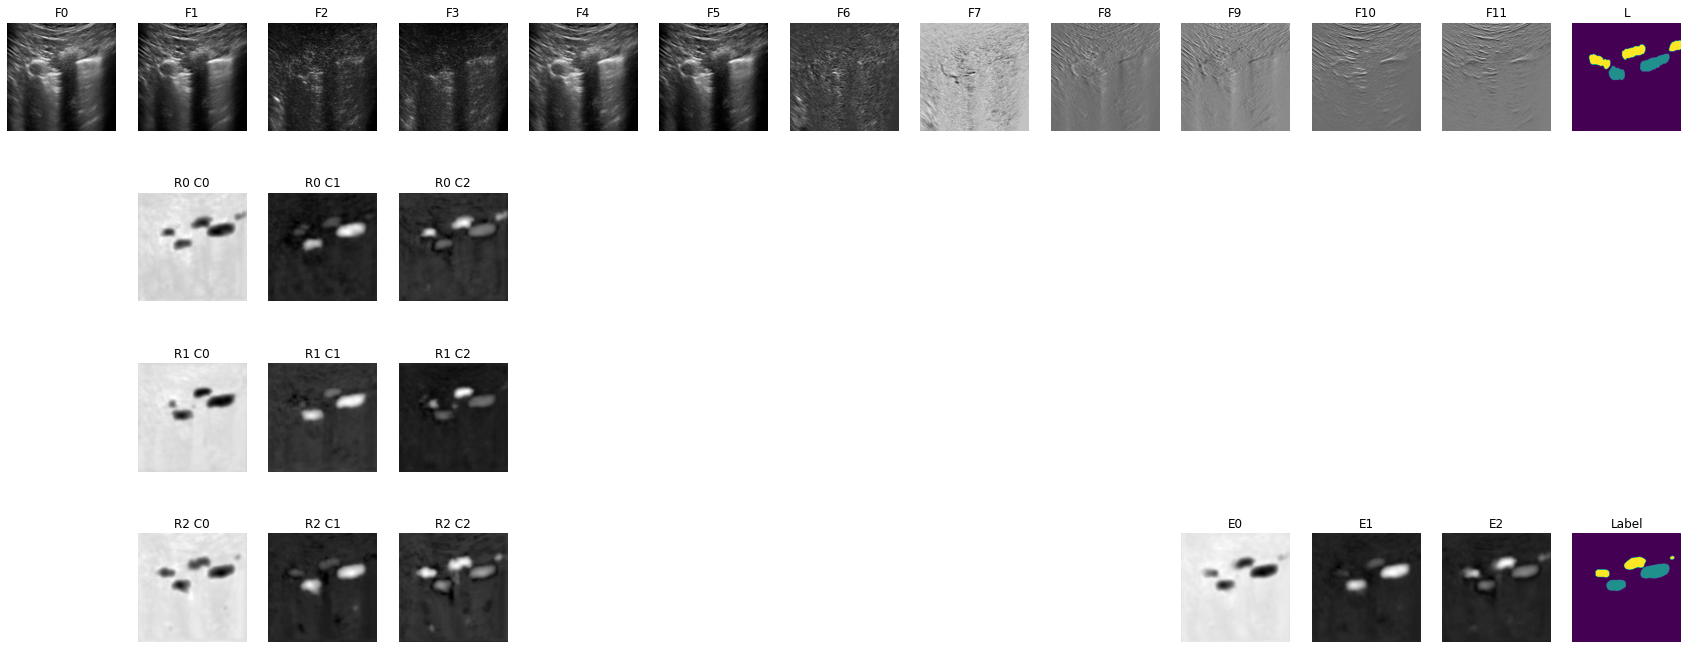

  Test Mean Dice Score =  0.7339098652203878


In [6]:
nnet.setup_testing_vfold(0)
nnet.view_testing_results_vfold("best",[0,1,2])